In [1]:
from ctm_python_client.core.workflow import Workflow, WorkflowDefaults
from ctm_python_client.core.comm import Environment
from aapi import *

workflow = Workflow(Environment.create_workbench('workbench'), WorkflowDefaults(run_as='workbench'))

workflow.clear_all()

zrembaJob = JobSAPR3BatchInputSession(
    'BATCHINPUTSESSIONJOB',
    connection_profile='SAP',
    target="SAP_SERVER",
    sub_application="zzt-flow",
    host="ctmawsdemoqa.vse.bmc.com",
    created_by="wzaremba&lbarbion",
    description="JOB 2: retrieve_inventory_data SAP ERP",
    run_as="SAPCP",
    application="zzt-demand-forecasting",
    variables = [{"SAPR3-DETECT_CHILD_JOBNAME": "zzt-Data-SAP1-inventory"}, {"SAPR3-MANAGE_SAP_PROFILE_TYPE": "INTERC"}, {"SAPR3-MANAGE_SAP_PROFILE_ACTION": "ACTIVATE"}],
    session=JobSAPR3BatchInputSession.Session(name="Stock_Session"),
    when=Job.When(
    month_days=['ALL'],
    week_days=['NONE'],
    days_relation=Job.When.DaysRelation.OR)
)


secondjob = workflow.add(
    zrembaJob,
    inpath='zarembaFolder'
)

workflow.deploy()

[DEBUG] Initializing shared Converter instance.
[DEBUG] Discovering all @attrs classes under aapi...
[DEBUG] Registering structure hooks for discovered @attrs classes...
[DEBUG] Registering structure hooks for the following classes: ['ConnectionProfileGCPDeploymentManager', 'PossibleOptions', 'SiteStandardPolicy', 'JobDatabaseMSSQL_SSIS', 'JobGCPBatch', 'ConnectionProfileDatabaseOracle', 'ConnectionProfileAwsRedshift', 'ConnectionProfileDatabaseSybase', 'JobVMwareConfigurationMigrateVirtualMachine', 'JobAirbyte', 'ConnectionProfileAzureBackup', 'JobCircleCI', 'AAPIJob', 'JobAwsAthena', 'ResourcePools', 'ConnectionProfileAwsSageMaker', 'ConnectionProfileKubernetes', 'JobCommand', 'JobCommunicationSuite', 'On', 'ConnectionProfileFileTransferS3Compatible', 'ConnectionProfileInformatica', 'JobVMwareSnapshot', 'AAPIObject', 'JobMessagingFreeText', 'ConditionOutAdd', 'SiteStandard', 'ConnectionProfileAwsLambda', 'ConnectionProfileAzureLogicApps', 'ConnectionProfileAnsibleAWX', 'JobAwsSQS', '

None


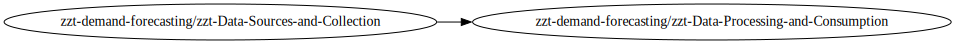

In [1]:
from ctm_python_client.core.workflow import Workflow, WorkflowDefaults
from ctm_python_client.core.comm import Environment
from aapi import *

workflow = Workflow(Environment.create_workbench('workbench'), WorkflowDefaults(run_as='workbench'))

# workflow = Workflow(my_env, defaults=defaults)

#FOLDER
folder1 = Folder("zzt-demand-forecasting", site_standard="Empty", controlm_server="IN01")
folder2 = Folder("zzt-demand-forecasting2", site_standard="Empty", controlm_server="IN01")


workflow.clear_all()
#Subfolders
zztDataSourcesandCollection = SubFolder("zzt-Data-Sources-and-Collection",)
zztDataSourcesandCollection_addEventsList = AddEvents([Event(event="zzt-Data-Sources-and-Collection_OK",date=Event.Date.OrderDate)])
zztDataSourcesandCollection.events_to_add.append(zztDataSourcesandCollection_addEventsList)
folder1.sub_folder_list.append(zztDataSourcesandCollection)

zztDataProcessingandConsumption = SubFolder("zzt-Data-Processing-and-Consumption")
zztDataProcessingandConsumption_WaitEventsList = WaitForEvents([Event(event="zzt-Data-Sources-and-Collection_OK",date=Event.Date.OrderDate)])
zztDataProcessingandConsumption.wait_for_events.append(zztDataProcessingandConsumption_WaitEventsList)
zztDataProcessingandConsumption_DeleteEventsList = DeleteEvents([Event(event="zzt-Data-Sources-and-Collection_OK",date=Event.Date.OrderDate)])
zztDataProcessingandConsumption.delete_events_list.append(zztDataProcessingandConsumption_DeleteEventsList)
#connection to SLA
zztDataProcessingandConsumption_addEventsList = AddEvents([Event(event="zztDataProcessingandConsumption_OK",date=Event.Date.OrderDate)])
zztDataProcessingandConsumption.events_to_add.append(zztDataProcessingandConsumption_addEventsList)
#END OF connection to SLA
folder1.sub_folder_list.append(zztDataProcessingandConsumption)
# a=workflow.add(folder1)
# b=workflow.add(folder2)


#TEST AREA
c= workflow.add(folder1)
# zztDataSourcesandCollection = SubFolder("zzt-Data-Sources-and-Collection",)
# zztDataProcessingandConsumption = SubFolder("zzt-Data-Processing-and-Consumption")
# folder1.sub_folder_list.append(zztDataSourcesandCollection)
# folder1.sub_folder_list.append(zztDataProcessingandConsumption)
# workflow.connect('zzt-demand-forecasting','zzt-demand-forecasting2')

d=workflow.connect("zzt-Data-Sources-and-Collection", "zzt-Data-Processing-and-Consumption",inpath="zzt-demand-forecasting")
#END OF TEST AREA
print(d)

from ctm_python_client.ext.viz import get_graph

get_graph(workflow)

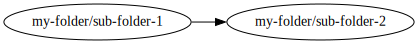

In [5]:
from ctm_python_client.core.workflow import Workflow, WorkflowDefaults
from ctm_python_client.core.comm import Environment
from aapi import *

workflow = Workflow(Environment.create_workbench('workbench'), WorkflowDefaults(run_as='workbench'))

# workflow = Workflow(my_env, defaults=defaults)

#FOLDER
folder = Folder("my-folder")

workflow.clear_all()
#Subfolders
subFolder1 = SubFolder("sub-folder-1")
folder.sub_folder_list.append(subFolder1)
subFolder2 = SubFolder("sub-folder-2")
folder.sub_folder_list.append(subFolder2)
workflow.add(folder)
workflow.connect("sub-folder-1", "sub-folder-2",inpath="my-folder")

from ctm_python_client.ext.viz import get_graph

get_graph(workflow)